In [1]:
import pandas as pd
import numpy as np

In [2]:
def calc_slope(df):
  x1, y1, x2, y2 = df['X1'],df['Y1'],df['X2'], df['Y2']

  slope = (y2 - y1) / (x2 - x1)
  # if x2 != x1 else float('inf')  # Avoid division by zero
  return slope




In [3]:
from google.colab import drive
drive.mount('/content/drive')
volumeTraces = pd.read_csv('/content/drive/MyDrive/YData/Project/VIZ.AI project/EchoNet-Dynamic/VolumeTracings.csv')


Mounted at /content/drive


In [4]:

volumeTraces['slope']  = calc_slope(volumeTraces)


In [8]:
slopes = volumeTraces.groupby(['FileName','Frame']).agg('first').reset_index()
# slopes.replace([np.inf, -np.inf], 0, inplace=True)

slopes = slopes.drop(['X1', 'Y1','X2','Y2'],axis=1)



,FileName,Frame,slope
0,0X100009310A3BD7FC.avi,46,3.933333
1,0X100009310A3BD7FC.avi,61,7.645161
2,0X1002E8FBACD08477.avi,3,2.527778
3,0X1002E8FBACD08477.avi,18,2.182796
4,0X1005D03EED19C65B.avi,24,2.867470
...,...,...,...
20045,0XFE6E32991136338.avi,45,7.514286
20046,0XFE83FF3D3B13C3A.avi,49,3.627451
20047,0XFE83FF3D3B13C3A.avi,67,9.105263
20048,0XFEBEEFF93F6FEB9.avi,25,-10.760000


None

In [ ]:
inf_rows_mask = np.isinf(slopes['slope'])
display((slopes[np.isinf( slopes['slope'] )]))


,FileName,Frame,X1,Y1,X2,Y2,slope
564,0X13881965FA7312E.avi,93,64.385417,66.208333,64.385417,20.817708,-inf
646,0X13ECF4B877219D8B.avi,1,59.098958,90.088542,59.098958,29.020833,-inf
817,0X1531B80C56297FD2.avi,129,56.233333,62.533333,56.233333,17.266667,-inf
849,0X156F3A66548E593A.avi,159,59.645833,67.848958,59.645833,24.645833,-inf
979,0X163D02E41A3A93D.avi,47,59.033333,71.633333,59.033333,29.166667,-inf
...,...,...,...,...,...,...,...
19502,0XC649E4EF24DCAB7.avi,47,55.270833,67.302083,55.270833,23.734375,-inf
19517,0XC8144B9EF1990EF.avi,101,56.233333,71.166667,56.233333,18.900000,-inf
19611,0XD0B87FA30CDF547.avi,90,54.541667,80.427083,54.541667,26.468750,-inf
19869,0XEC02C6EDC625DCE.avi,294,58.369792,68.395833,58.369792,25.921875,-inf


,FileName,Frame,X1,Y1,X2,Y2,slope
0,0X100009310A3BD7FC.avi,46,51.260417,15.348958,64.932292,69.125000,3.933333
1,0X100009310A3BD7FC.avi,61,56.000000,19.541667,61.651042,62.744792,7.645161
2,0X1002E8FBACD08477.avi,3,48.161458,20.635417,67.848958,70.401042,2.527778
3,0X1002E8FBACD08477.avi,18,52.536458,27.015625,69.489583,64.020833,2.182796
4,0X1005D03EED19C65B.avi,24,65.843750,20.270833,80.973958,63.656250,2.867470
...,...,...,...,...,...,...,...
20045,0XFE6E32991136338.avi,45,55.453125,20.453125,61.833333,68.395833,7.514286
20046,0XFE83FF3D3B13C3A.avi,49,45.966667,21.700000,57.866667,64.866667,3.627451
20047,0XFE83FF3D3B13C3A.avi,67,51.800000,19.833333,56.233333,60.200000,9.105263
20048,0XFEBEEFF93F6FEB9.avi,25,56.729167,66.390625,61.286458,17.354167,-10.760000


In [ ]:

display(slopes.iloc[slopes['slope'].argsort()])
import seaborn as sns

,FileName,Frame,X1,Y1,X2,Y2,slope
3735,0X27187ECFBEB82A72.avi,91,54.600000,75.833333,54.600000,35.000000,-inf
9553,0X492B188B388D9C73.avi,55,51.442708,68.760417,51.442708,29.567708,-inf
979,0X163D02E41A3A93D.avi,47,59.033333,71.633333,59.033333,29.166667,-inf
3848,0X27CA6FFE2C5843BD.avi,0,58.800000,63.233333,58.800000,19.366667,-inf
16868,0X74ECBD41FE00FDA9.avi,44,56.364583,93.734375,56.364583,31.755208,-inf
...,...,...,...,...,...,...,...
18209,0X7D24D09D4B66FB12.avi,81,54.906250,33.213542,55.088542,94.645833,336.999994
17928,0X7B76CB1D495CDC4A.avi,134,54.177083,16.078125,54.359375,79.880208,349.999994
4955,0X2E733C8B779C06B7.avi,55,52.171875,23.005208,52.354167,87.718750,354.999994
368,0X12185F79407DF986.avi,51,56.000000,17.901042,56.182292,83.161458,357.999993


<Axes: xlabel='slope', ylabel='Count'>

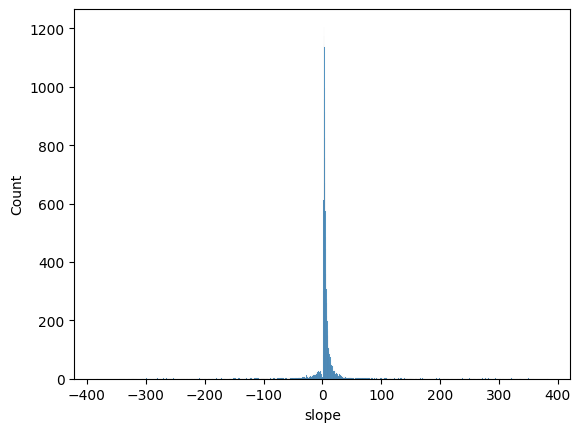

In [ ]:
sns.histplot(data = slopes, x = 'slope'  )